# Investigating overall section GPA trends across time.

This notebook uses data from the UW Madison database to complete hyphothesis tests comparing mean section grades in each year to the mean section grades for all years.

$H_0$: The grading in this year is the same as the overall grading.

$H_A$: The grading in this year is different from the overall grading.

## Import necessary Python libraries and modules

In [1]:
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

## Query the database and create a dataframe of each year's mean grades for each section

In [2]:
engine = create_engine('postgresql:///uw_madison')
df = pd.read_sql_query("""SELECT * FROM section_grades_term;""", engine)

all_years = df
oh_six = df.loc[df['term_code'].isin(['1072', '1074'])] #2006-2007
oh_seven = df.loc[df['term_code'].isin(['1082', '1084'])] #2007-2008
oh_eight = df.loc[df['term_code'].isin(['1092', '1094'])] #2008-2009
oh_nine = df.loc[df['term_code'].isin(['1102', '1104'])] #2009-2010
ten = df.loc[df['term_code'].isin(['1112', '1114'])] #2010-2011
eleven = df.loc[df['term_code'].isin(['1122', '1124'])] #2011-2012
twelve = df.loc[df['term_code'].isin(['1132', '1134'])] #2012-2013
thirteen = df.loc[df['term_code'].isin(['1142', '1144'])] #2013-2014
fourteen = df.loc[df['term_code'].isin(['1152', '1154'])] #2014-2015
fifteen = df.loc[df['term_code'].isin(['1162', '1164'])] #2015-2016
sixteen = df.loc[df['term_code'].isin(['1172', '1174'])] #2016-2017

## Visualize and test each year as compared to the entire population.

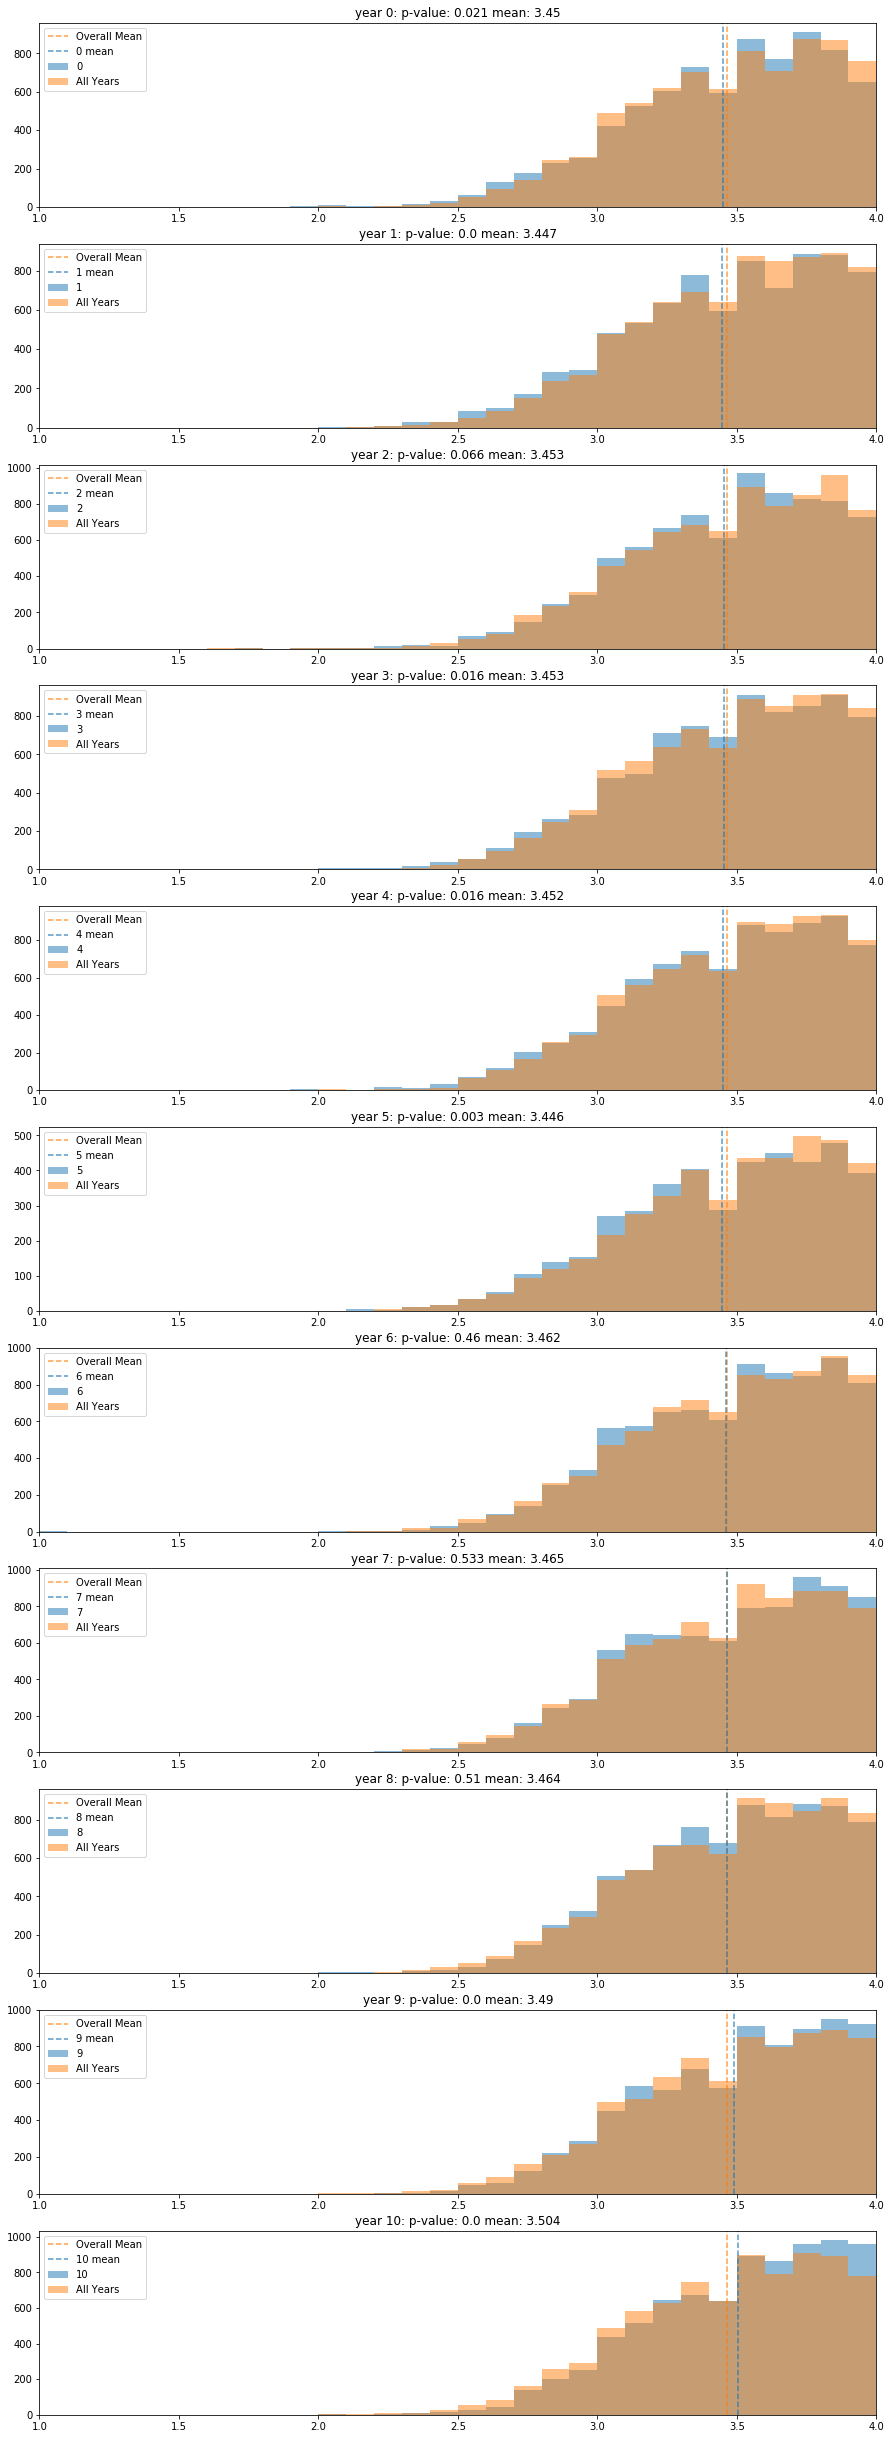

In [3]:
years = [oh_six, oh_seven, oh_eight, oh_nine, ten, 
         eleven, twelve, thirteen, fourteen, fifteen, sixteen]
yr_means = []

fig, ax = plt.subplots(nrows=len(years), ncols=1,
                      figsize=(15, len(years)*4))
for row, year in enumerate(years):
    year_dist = year['section_gpa']
    pop_dist = np.random.choice(all_years['section_gpa'], size=len(year_dist), replace=False)
    statistics = stats.ttest_ind(year_dist, pop_dist)
    yr_means.append(year_dist.mean())
    
    ax[row].hist(year_dist, alpha = .5, label=row, range=(1, 4), bins=30)
    ax[row].hist(pop_dist, alpha = .5, label='All Years', range= (1, 4), bins=30)
    ax[row].axvline(all_years['section_gpa'].mean(), color='#ff7f0e', alpha=.75, 
               label='Overall Mean', linestyle='dashed')
    ax[row].axvline(year_dist.mean(), color='#1f77b4', alpha=.75, 
               label=f'{row} mean', linestyle='dashed')
    ax[row].set_title(f'year {row}: p-value: {round(statistics[1], 3)} mean: {round(year_dist.mean(), 3)}')
    ax[row].legend()
    ax[row].set_xlim(1,4)

## Visualize the mean section GPA over time

In [4]:
yr_nums = np.array(range(2006, 2017)).reshape(-1,1)
yr_means= np.array(yr_means).reshape(-1,1)

reg = LinearRegression().fit(yr_nums, yr_means)

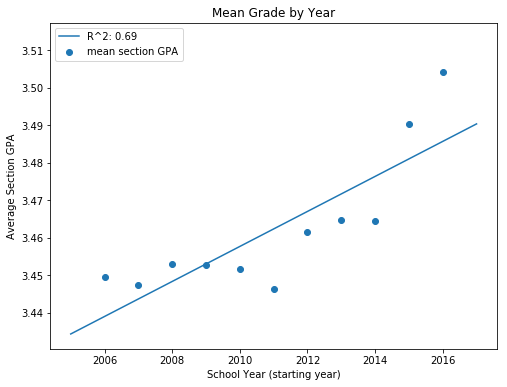

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
# plot data points
ax.scatter(x=yr_nums, y=yr_means, label='mean section GPA')
ax.set_title('Mean Grade by Year')
ax.set_xlabel('School Year (starting year)')
ax.set_ylabel('Average Section GPA')

# plot regression line
x=np.linspace(2005, 2017, 1000)
y=(reg.coef_*x + reg.intercept_)[0]
ax.plot(x, y, label=f'R^2: {round(reg.score(yr_nums, yr_means),2)}')
ax.legend(loc='upper left');


# Analysis

We reject the null hypothesis that there is no difference in grading for the years 2006-2007, 2007-2008, 2008-2009, 2009-2010, 2010-2011, 2011-2012, 2015-2016, 2016-2017 at a 95% confidence interval.

We fail to reject the null hypothesis for the years 2012-2013, 2013-2014, and 2014-2015.